In [1]:
# library 
import wntr
import pandas as pd
import math

In [2]:
# Create a water network model
inp_file = 'D:/IHE/test/Network_2.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

c:\python\WPy64-31090\python-3.10.9.amd64\lib\site-packages\wntr\epanet\io.py:2076: UserWarning: Not all curves were used in "D:/IHE/test/Network_2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


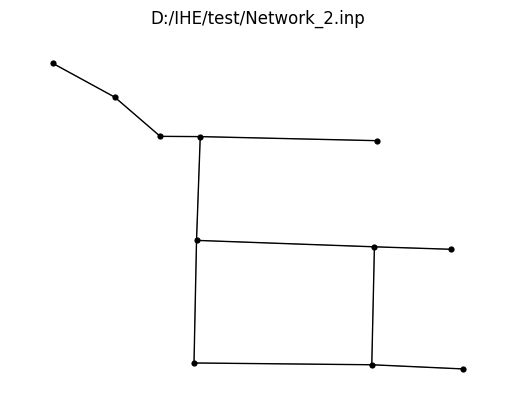

<AxesSubplot: title={'center': 'D:/IHE/test/Network_2.inp'}>

In [3]:
# Graph the network
wntr.graphics.plot_network(wn, title=wn.name)

In [4]:
# Simulate hydraulics
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

In [5]:
# extract pressure of nodes to excel
pressure = results.node['pressure']
pressure.to_excel('pressure.xlsx')

c:\python\WPy64-31090\python-3.10.9.amd64\lib\site-packages\wntr\epanet\io.py:2076: UserWarning: Not all curves were used in "D:/IHE/test/Network_2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


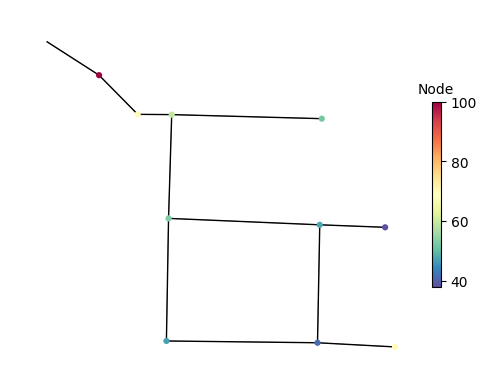

In [6]:
# extract elevation of nodes to excel 
import wntr 
wn = wntr.network.WaterNetworkModel('D:/IHE/test/Network_2.inp')
ax = wntr.graphics.plot_network(wn, node_attribute='elevation')

In [7]:
# extract daily demand  of nodes to excel = base demand * 1.2 
demand = results.node['demand']
demand.to_excel('demand.xlsx')

In [8]:
# extract Hact  of nodes to excel  
head = results.node['head']
head.to_excel('head.xlsx')

In [9]:
demand = pd.read_excel("demand.xlsx")
elevation = pd.read_excel("elevation.xlsx")
pressure = pd.read_excel("pressure.xlsx")
head = pd.read_excel("head.xlsx")

In [10]:
print(elevation)

     Node ID                  m               
0   Junc 2                                59.0
1   Junc 3                                53.0
2   Junc 4                                47.0
3   Junc 5                                52.0
4   Junc 6                                47.5
5   Junc 7                                41.0
6   Junc 8                                38.0
7   Junc 9                                75.0
8   Junc 1                                70.0
9   Resvr 10                             120.0
10  Tank 12                              100.0


In [11]:
#hmin
Hmin=elevation.iloc[:, -1]+20

In [12]:
hmin = Hmin[0: -2]
hmin

0    79.0
1    73.0
2    67.0
3    72.0
4    67.5
5    61.0
6    58.0
7    95.0
8    90.0
Name: m               , dtype: float64

In [13]:
print(len(hmin))

9


In [14]:
# Read the Excel file into a DataFrame
demand = pd.read_excel('demand.xlsx')
# Calculate the average of each column
column_averages = demand.mean()
# Calculate the daily demand for each column by multiplying with 1000 and rounding to one decimal place
daily_demand = round(column_averages * 1000, 1)
# Print the column averages
print(daily_demand)

Unnamed: 0    43200000.0
2                   21.6
3                   13.3
4                   19.4
5                   39.1
6                   27.5
7                   31.4
8                   82.2
9                   12.4
1                    0.0
10                 -84.1
12                -162.9
dtype: float64


In [15]:
avg_daily_demand = list(daily_demand[1:-2])
print(len(avg_daily_demand))

9


In [16]:
############################### Emix =Emin+ Energy dissipated from water loss EdissRWL ####################################
indx = 0
Emix = []
for value in hmin:
    Emix.append(hmin[indx] * avg_daily_demand[indx] * 0.847584)
    indx = indx + 1 

Emix
    

[1446.3173376,
 822.9193056,
 1101.6896832,
 2386.1184768000003,
 1573.3278,
 1623.4623935999998,
 4040.9414784000005,
 998.453952,
 0.0]

In [17]:
sum(Emix)

13993.2304272

In [18]:
# Read the Excel file into a DataFrame
demand = pd.read_excel('head.xlsx')
# Calculate the average of each column
column_averages = head.mean()
# Calculate the aver_head for each column tow decimal place
aver_head = round(column_averages , 2)
# Print the column averages
print(aver_head)

Unnamed: 0    43200.00
2                79.00
3                78.13
4                77.39
5                78.88
6                76.61
7                76.65
8                74.74
9                76.61
1               118.81
10              120.00
12              120.61
dtype: float64


In [19]:
aver_head = list(aver_head[1:-2])
print(len(aver_head))

9


In [20]:
aver_head

[79.0, 78.13, 77.39, 78.88, 76.61, 76.65, 74.74, 76.61, 118.81]

In [21]:
###################################### Energy delivered to consumers Esup ###############################################
###### Note if the result is + means Hact>Hmin
######       if the result is 0 means Hact=Hmin  like node 2 or there is no daimand like node 1
######       if the result is - means Hact<Hmin   like node 9 
indx = 0
Esup_all = []
for value in hmin:
    Esup_all.append((aver_head[indx]-hmin[indx]) * avg_daily_demand[indx] * 0.847584)
    indx = indx + 1 
    

Esup_all


[0.0,
 57.829808735999954,
 170.844116544,
 228.00687667199983,
 212.3409816,
 416.51125344000013,
 1166.2993163519996,
 -193.279665024,
 0.0]

In [22]:
Esup= 0

for value in Esup_all:
    if value > 0:
        Esup += value

print(Esup)


2251.8323533439993


In [23]:
###################################### Energy delivered to consumers Eins (insufficient) ###############################################
###### Note if the result is - means Hact<Hmin   like node 9 
indx = 0
Eins = []
for value in hmin:
    Eins.append((aver_head[indx]-hmin[indx]) * avg_daily_demand[indx] * 0.847584)
    indx = indx + 1 
    

Eins

[0.0,
 57.829808735999954,
 170.844116544,
 228.00687667199983,
 212.3409816,
 416.51125344000013,
 1166.2993163519996,
 -193.279665024,
 0.0]

In [24]:
Eins = []

for indx in range(len(hmin)):
    if (aver_head[indx] - hmin[indx]) < 0:
        Eins.append((aver_head[indx]) * avg_daily_demand[indx] * 0.847584)

print(Eins)


[805.1742869760001]


In [25]:
#######################################             pipes    ########################################################

In [26]:
# creat the result of flowrate and convert to excel
flowrate = results.link['flowrate']
flowrate.to_excel('flowrate.xlsx')
# Read the Excel file into a DataFrame
flowrate = pd.read_excel('flowrate.xlsx')
# Calculate the average of each column
column_averages_flowrate = flowrate.mean()
# Calculate the flowrate for each column by multiplying with 1000 and rounding to one decimal place
aver_flowrate = round(column_averages_flowrate*1000, 1)
# Print the column averages flowrate

print(aver_flowrate)

Unnamed: 0    43200000.0
2                  186.3
3                   80.3
4                   39.1
5                   92.6
6                   60.9
8                   82.2
9                   12.4
7                  -17.1
13                  84.1
12                -247.0
11                 247.0
dtype: float64


In [27]:
aver_flowrate = list(aver_flowrate[1:])
print((aver_flowrate))

[186.3, 80.3, 39.1, 92.6, 60.9, 82.2, 12.4, -17.1, 84.1, -247.0, 247.0]


In [28]:
aver_flowrate = list(aver_flowrate[1:])

for i in range(len(aver_flowrate)):
    if aver_flowrate[i] < 0:
        aver_flowrate[i] = abs(aver_flowrate[i])

print(aver_flowrate)


[80.3, 39.1, 92.6, 60.9, 82.2, 12.4, 17.1, 84.1, 247.0, 247.0]


In [29]:
###### unit headloss ######
# creat the result of headloss and convert to excel
headloss = results.link['headloss']
headloss.to_excel('headloss.xlsx')
# Read the Excel file into a DataFrame
headloss = pd.read_excel('headloss.xlsx')
# Calculate the average of each column
column_averages_headloss = headloss.mean()
# Calculate the headloss for each column by multiplying with 1000 and rounding to one decimal place
aver_headloss_all = round(column_averages_headloss*1000, 2)
# Print the column averages headloss

print(aver_headloss_all)

Unnamed: 0    43200000.00
2                    2.02
3                    1.23
4                    0.11
5                    1.60
6                    0.70
8                    2.40
9                    0.07
7                    0.06
13                   7.67
12                   3.59
11               39808.80
dtype: float64


In [30]:
aver_headloss = list(aver_headloss_all[1:-1])
print(aver_headloss)

[2.02, 1.23, 0.11, 1.6, 0.7, 2.4, 0.07, 0.06, 7.67, 3.59]


In [31]:
wn = wntr.network.read_inpfile('D:/IHE/test/Network_2.inp')
wn_dict = wntr.network.to_dict(wn)

lengths = []  # Create an empty list to store the lengths

for link in wn_dict['links']:
    length = link.get('length')
    lengths.append(length)
    
print(lengths)


[430.0, 600.0, 1100.0, 950.0, 1050.0, 780.0, 590.0, 660.0, 500.0, 500.0, None]


c:\python\WPy64-31090\python-3.10.9.amd64\lib\site-packages\wntr\epanet\io.py:2076: UserWarning: Not all curves were used in "D:/IHE/test/Network_2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


In [32]:
length_pipes = list(lengths[:-1])
print((length_pipes))

[430.0, 600.0, 1100.0, 950.0, 1050.0, 780.0, 590.0, 660.0, 500.0, 500.0]


In [33]:
len(length_pipes)

10

In [34]:
###### hloss (m) ###### = length * unit head loss
indx = 0
hloss = []
for value in aver_headloss:
    hloss.append((length_pipes[indx])*(aver_headloss[indx])/1000) 
    indx = indx + 1 

hloss

[0.8686, 0.738, 0.121, 1.52, 0.735, 1.872, 0.0413, 0.0396, 3.835, 1.795]

In [35]:
######################################### Energy dissipated  Edissp #################################### 
Edissp = []
indx = 0

for value in hloss:
    ediss_value = round(hloss[indx] * aver_flowrate[indx] * 0.847584, 2)
    Edissp.append(ediss_value)
    indx += 1

print(Edissp)

[59.12, 24.46, 9.5, 78.46, 51.21, 19.67, 0.6, 2.82, 802.87, 375.79]


In [36]:
sum(Edissp)

1424.5

c:\python\WPy64-31090\python-3.10.9.amd64\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


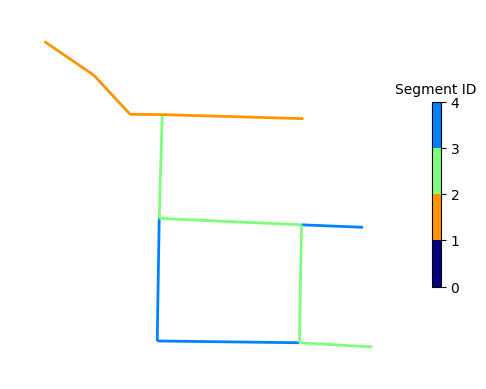

In [37]:
valve_layer = wntr.network.generate_valve_layer(wn, 'strategic', 2, seed=123)
G = wn.to_graph()
node_segments, link_segments, seg_sizes = wntr.metrics.topographic.valve_segments(G,
    valve_layer)
N = seg_sizes.shape[0]
cmap = wntr.graphics.random_colormap(N) # random color map helps view segments
ax = wntr.graphics.plot_network(wn, link_attribute=link_segments, node_size=0,
    link_width=2, node_range=[0,N], link_range=[0,N], node_cmap=cmap,
    link_cmap=cmap, link_colorbar_label='Segment ID')
ax = wntr.graphics.plot_valve_layer(wn, valve_layer, add_colorbar=False,
    include_network=False, ax=ax)

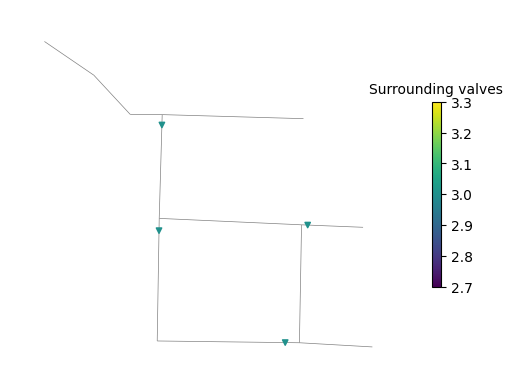

In [38]:
valve_attributes = wntr.metrics.valve_segment_attributes(valve_layer, node_segments,
    link_segments)
ax = wntr.graphics.plot_valve_layer(wn, valve_layer,
    valve_attributes['num_surround'], colorbar_label='Surrounding valves')

In [39]:
#flow rate in valve 16 
valve11 = (aver_flowrate[-1])
print((valve11))

247.0


In [40]:
headloss11 = (column_averages_headloss[-1])
print(headloss11)

39.80879837036133


In [41]:
#################################### Energy dissipated Edissv #####################################
Edissv = round(valve11 * headloss11 * 0.847584, 2)
print(Edissv)

8334.1


In [42]:

# Load the water network model from an EPANET input file
inp_file = 'D:/IHE/test/Network_2.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Assuming you have a junction called 'Junction1' in your network
junction_name = '8'

# Access the junction object using the junction name
junction = wn.get_node(junction_name)

# Read the emitter coefficient attribute of the junction
emitter_coefficient = junction.emitter_coefficient


# Print the emitter coefficient value
print(f"Emitter Coefficient of {junction_name}: {emitter_coefficient}")

Emitter Coefficient of 8: 0.01


c:\python\WPy64-31090\python-3.10.9.amd64\lib\site-packages\wntr\epanet\io.py:2076: UserWarning: Not all curves were used in "D:/IHE/test/Network_2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


In [43]:

# Load the water network model from an EPANET input file
inp_file = 'D:/IHE/test/Network_2.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Loop through all junctions in the network
for junction_name, junction in wn.junctions():
    # Read the emitter coefficient attribute of the junction
    emitter_coefficient = junction.emitter_coefficient
    
    # Print the emitter coefficient value for each junction
    print(f"Emitter Coefficient of {junction_name}: {emitter_coefficient}")


Emitter Coefficient of 2: None
Emitter Coefficient of 3: None
Emitter Coefficient of 4: None
Emitter Coefficient of 5: None
Emitter Coefficient of 6: None
Emitter Coefficient of 7: None
Emitter Coefficient of 8: 0.01
Emitter Coefficient of 9: None
Emitter Coefficient of 1: None


In [44]:
# Load the water network model from an EPANET input file
inp_file = 'D:/IHE/test/Network_2.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Assuming you have a junction called '8' in your network
junction_name = '8'

# Access the junction object using the junction name
junction = wn.get_node(junction_name)

# Get the expected demand at the junction
expected_demand = junction.base_demand

# Print the expected demand at node 6 m3/s
print(expected_demand)

0.0185


In [45]:
# Load the water network model from an EPANET input file
inp_file = 'D:/IHE/test/Network_2.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Assuming you have a junction called '8' in your network
junction_name = '8'

# Access the junction object using the junction name
junction = wn.get_node(junction_name)

# Get the expected demand at the junction in cubic meters per second (m³/s)
expected_demand_mps = junction.base_demand

# Convert the expected demand from m³/s to liters per second (l/s)
expected_demand_lps = expected_demand_mps * 1000

# Print the expected demand at node 8 in l/s
print(expected_demand_lps)


18.5


In [46]:
# Read the Excel file into a DataFrame
demand = pd.read_excel('demand.xlsx')
# Calculate the average of each column
column_averages = demand.mean()
# Calculate the daily demand for each column by multiplying with 1000 and rounding to one decimal place
daily_demand = round(column_averages * 1000, 1)
# Print the column averages
print(daily_demand)

Unnamed: 0    43200000.0
2                   21.6
3                   13.3
4                   19.4
5                   39.1
6                   27.5
7                   31.4
8                   82.2
9                   12.4
1                    0.0
10                 -84.1
12                -162.9
dtype: float64


In [47]:
# Read the Excel file into a DataFrame
demand = pd.read_excel('demand.xlsx')

# Assuming '8' is the column name for junction 8 demand in the DataFrame
junction_name = '8'

# Calculate the average demand for junction 8
average_demand_junction_8 = round(demand[junction_name].mean()*1000, 1)

# Print the average demand for junction 8
print(average_demand_junction_8)

82.2


In [48]:
# Actual consumption = 1.2 (Demand multiplie)* expected_demand
Actual_consumption= 1.2 * expected_demand_lps

#leakage = actual comsumption - total demand
leakage_8 = average_demand_junction_8 - Actual_consumption  
print (leakage_8)

60.0


In [49]:
#################################### Energy dissipated due to real water losses EdissRWL #####################################
EdissRWL = round(leakage_8 * average_demand_junction_8 * 0.847584, 2)
print(EdissRWL)

4180.28


In [50]:
############################### Emin = Emix - Energy dissipated from water loss EdissRWL ####################################
Emin = round( sum(Emix) - EdissRWL, ) 
print(Emin)

9813


In [51]:
############################################################# Etotal  ############################################################
Etotal= (Emin + Esup + sum(Edissp) + Edissv  + EdissRWL + Eins )
print (Etotal)

[26808.887]


In [52]:
############################################ Sankey digram ###################################################

In [60]:
import plotly.graph_objects as go



# Calculate the total Etotal
Etotal = Emin + Esup + sum(Edissp) + Edissv  + EdissRWL + Eins

# Create labels for the nodes
label = ["Etotal", "Emin", "sum(Esup)", "sum(Edissp)", "Edissv", "EdissRWL", "Eins"]

# Define the links between nodes
source = [0, 0, 0, 0, 0, 0]  # Source nodes for the links
target = [1, 2, 3, 4, 5, 6]  # Target nodes for the links

# Calculate the values for the links
value = [ Emin , Esup , sum(Edissp) , Edissv  , EdissRWL , Eins]

# Define colors for the links
color_link = ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)',
              'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)',
              'rgba(227, 119, 194, 0.8)']

# Create the link and node dictionaries
link = dict(source=source, target=target, value=value, color=color_link)
node = dict(label=label, pad=35, thickness=10)

# Create the Sankey diagram
data = go.Sankey(link=link, node=node)

# Create the figure and show the plot
fig = go.Figure(data=[data])
fig.show()


In [54]:
# second sankey digram

In [55]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Enc", "Einp", "Emin", "Esup", "Edissp", "Edissv", "EdissRWL", "Eins"],
      color = "blue"
    ),
    link = dict(
      source = [0,  1, 1,  1, 1, 1 , 1], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1,  2, 3,  4 , 5, 6 , 7],
      value = [26500, 11043.6,  1400.50,  1129.22 , 8334.14 , 3800.91, 805]
  ))])



fig.update_layout(title_text="Basic Sankey Diagram", font_size=20)
fig.show()

In [58]:
# more details

In [67]:
Esup_all

[0.0,
 57.829808735999954,
 170.844116544,
 228.00687667199983,
 212.3409816,
 416.51125344000013,
 1166.2993163519996,
 -193.279665024,
 0.0]

In [78]:
import plotly.graph_objects as go

# Calculate the total Etotal
Etotal = Emin + Esup + sum(Edissp) + Edissv  + EdissRWL + Eins

# Create labels for the nodes
label = ["Etotal", "Emin", "sum(Esup)", "sum(Edissp)", "Edissv", "EdissRWL", "Eins"]

# Define the links between nodes
source = [0, 0, 0, 0, 0, 0]  # Source nodes for the links
target = [1, 2, 3, 4, 5, 6]  # Target nodes for the links

# Calculate the values for the links
value = [Emin , Esup , sum(Edissp) , Edissv  , EdissRWL , Eins]

# Define colors for the links
color_link = ['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)',
              'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)',
              'rgba(227, 119, 194, 0.8)']

# Create the link and node dictionaries
link = dict(source=source, target=target, value=value, color=color_link)
node = dict(label=label, pad=35, thickness=25)

# Create the Sankey diagram
data = go.Sankey(link=link, node=node)

# Given data for the second Sankey diagram
pipe_names = ['2', '3', '4', '5', '6', '8', '9', '7', '13', '12']
pipe_results = [137.16, 50.23 ,4.01 ,119.30, 37.94 , 130.42 , 0.43 , 0.57 , 273.37, 375.79 ]

# Create labels for the nodes
label_edissp = ["sum(Edissp)"] + pipe_names

# Define the links between nodes
source_edissp = [0] * len(pipe_names)
target_edissp = list(range(1, len(pipe_names) + 1))

# Create the link and node dictionaries for the second Sankey diagram
link_edissp = dict(source=source_edissp, target=target_edissp, value=pipe_results, color=color_link)
node_edissp = dict(label=label_edissp, pad=35, thickness=10)

# Create the Sankey diagram for sum(Edissp)
data_edissp = go.Sankey(link=link_edissp, node=node_edissp)

# Given data for the third Sankey diagram
# Assuming sum(Esup) results are stored in a list called 'Esup_list'
# Esup_list = [50, 60, 70, 80, 90]

# Create labels for the nodes
label_esup = [ "sum(Esup", "2", "3", "4", "5", "6", "7", "8", "9", "1"]
Esup_list=[0 , 57.83, 170.84 , 228.01, 212.34, 416.51, 314.99]
# Define the links between nodes
source_esup = [0] * len(Esup_list)  # Source node for the links (sum(Esup))
target_esup = list(range(1, len(Esup_list) + 1))  # Target nodes for the links (2, 3, 4, etc.)

# Create the link and node dictionaries for the third Sankey diagram
link_esup = dict(source=source_esup, target=target_esup, value=Esup_list, color=color_link)
node_esup = dict(label=label_esup, pad=35, thickness=25)

# Create the Sankey diagram for sum(Esup) results
data_esup = go.Sankey(link=link_esup, node=node_esup)

# Create the figure and show the combined plots
fig = go.Figure(data=[data, data_edissp, data_esup])
fig.show()